# Урок 2
## Дискретные случайные величины. Закон распределения вероятностей. Биномиальный закон распределения. Распределение Пуассона

### Задача 1

####  Условие: 

Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании. Найдите ```M(X)```, ```D(X)```.

#### Решение:
Очевидно, что в данном случае идет речь о биномиальном законе распределения.

Биномиальный закон распределения описывается __формулой Бернулли__:
$$P(X = k) = C_n^k p^k (1 - p)^{n - k}$$

В данном случае $n = 5$, $p = \dfrac{1}{4}$

$$P(X = k) = C_5^k (\dfrac{1}{4})^k (1 - \dfrac{1}{4})^{5 - k} = C_5^k (\dfrac{1}{4})^k (\dfrac{3}{4})^{5 - k}$$


In [13]:
import numpy as np

In [14]:
def combinations(n: int, k: int) -> int:
    """Число сочетаний.
    """
    
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

In [15]:
def binomial_proba(k: int, n: int, p: float) -> float:
    return combinations(n, k) * (p**k) * ((1 - p)**(n - k))

In [17]:
n = 5
p = 1/4

Возможно угадать от 0 до 5 билетов включительно:

In [18]:
x_list = np.arange(0, n + 1)
x_list

array([0, 1, 2, 3, 4, 5])

In [19]:
y_list = np.array([binomial_proba(x, n, p) for x in x_list])
y_list

array([0.23730469, 0.39550781, 0.26367188, 0.08789062, 0.01464844,
       0.00097656])

In [20]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

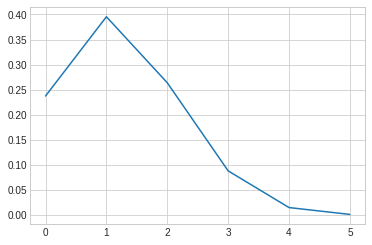

In [21]:
plt.plot(x_list, y_list)

Математическое ожидание и дисперсию для биномиально распределённой дискретной величины можно вычислить по формулам:
$$M(X) = np, \: D(X) = np(1 - p).$$

In [26]:
m = n * p
m

1.25

In [27]:
d = n * p * (1 - p)
d

0.9375

### Задача 2

#### Условие:
Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число `N`, такое, что с вероятностью 0.95 пользователь получит не более `N` писем со спамом за текущий день.

#### Решение:
Т.к. речь идет о потоке событий, то это распределение Пуассона:
$$P(X = k) = \dfrac{\lambda^k e^{-\lambda}}{k!}$$
Где $\lambda = 10$

In [30]:
def puasson_proba(k: int, lambda_):
    return (lambda_ ** k) * np.exp(-lambda_) / np.math.factorial(k)

Пользователь может получить от нуля до бесконечности писем, сл-но, будем считать сумму вероятностей получить ровно $i$ писем, пока сумма будет меньше не получится 0.95, где $i=1,2,\dots$

In [35]:
lambda_ = 10

spam_count = -1
p = 0

while p < 0.95:
    spam_count += 1
    p += puasson_proba(spam_count, lambda_)
    
spam_count, p

(15, 0.9512595966960214)

### Задача 3

#### Условие:
Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

Подсказка:

    1) "Вероятность попасть k раз при n выстрелах" - на какое распределение это похоже? 
    2) А если нам нужна вероятность P(X >= k), а не P(X = k)? 
    3) Здесь предстоит немножко покодить.

#### Решение:
"Вероятность попасть k раз при n выстрелах" - биномиальное распределение

Биномиальный закон распределения описывается __формулой Бернулли__:
$$P(X = k) = C_n^k p^k (1 - p)^{n - k}$$

Мы знаем, что сумма вероятностей случайной величины всегда равна $1$. Значит, вероятность получить хотя бы k попаданий равна:
$$P(X \geq k) = 1 - P(X < k)$$

In [38]:
p = 0.01
P = -1
k = 6
n = 9

while P < 0.9:
    n += 1
    P = 1 - sum(binomial_proba(i, n, p) for i in range(k))

n, P

(926, 0.9003627121531355)